##### Спецкурс. Методы и алгоримы компьютерного зрения

## Кратномасштабный анализ Хаара на прямой

Варианты включает в себя одну теоретическую задачу и одну практическую, состоящую из частей 1, 2, 3. Номер задачи соответствует номеру варианта, а номер варианта соответствует номеру студента в списке группы. Практические задачи выполняются ручным счетом (без использования каких-либо программ). Для проверки правильности разложения функции необходимо построить графики данной функции и ее разложения. Результаты должны совпасть. Для построения графиков можно использовать код Python, представленный в данной части. 

#### $\S$ 1.  Кратномасштабный анализ Хаара на прямой

Пусть

$$
\varphi (x)= \chi_{[0;1)} (x)=\begin{cases}1, ~ \text{если} ~ x\in [0;1)\\ 0, ~ \text{если} ~ x\not\in [0;1) \end{cases}
$$

и $\varphi_{j,k}(x) = 2^{\frac{j}{2}} \varphi(2^j x - k)$. Функция $\varphi (x)$ удовлетворяет масштабному соотношению $\varphi(x) = \varphi(2x) + \varphi(2x-1)$. Отсюда

$$
\varphi(x) = u_0\varphi_{1,0}(x) + u_1 \varphi_{1,1}(x), ~~ u_0 = u_1 = \frac{1}{\sqrt{2}}.
$$

Следовательно, если

$$
v_{k} =(-1)^{k-1} \overline{u_{1-k} }=\begin{cases} -\frac{1}{\sqrt{2} },~ k=0; \\ \frac{1}{\sqrt{2} },~ k=1; \\  0,~ k\ne 0,1, \end{cases}
$$

то, материнский вейвлет  Хаара имеет вид

$$
\psi (x)=\sum _{k\in {\bf Z}}v_{k} \varphi _{1,k} (x) =-\varphi (2x)+\varphi (2x-1)=\begin{cases} -1,~x\in [0;1/2); \\ 1,~x\in [1/2;1); \\ 0,~ x\notin [0;1). \end{cases}
$$

Вейвлет-система Хаара $\psi _{j,k} (t)$ получается из вейвлета $\psi$ с помощью сдвигов и растяжений

$$
\psi _{j,k} (t)=2^{j/2} \psi (2^{j} t-k),~j,k\in {\bf Z}.
$$

Пусть $\left\{V_{j} \right\}_{j\in {\bf Z}} $ -- кратномасштабный анализ (КМА) с масштабирующей функцией $\varphi$, где

$$
V_j = \left\{\sum\limits_{k\in\mathbf{Z}} c_k\varphi_{j,k}, ~ \{c_k\}_{k\in\mathbf{Z}}\in l_2(\mathbf{Z})\right\}.
$$

В этом случае

$$
\ldots\subset V_{-1} \subset V_{0} \subset V_{1} \subset \ldots,~\bigcap\limits_{j\in {\bf Z}} V_{j}=\{ 0\},~\overline{\bigcup\limits_{j\in {\bf Z}} V_{j} }=\mathrm{L}_{2} ({\bf R}).
$$ 

Вейвлет-пространства $W_j$ определяются равенствами $V_{j+1}=V_j\oplus W_j$. Имеет место равенство

$$
W_j = \left\{\sum\limits_{k\in\mathbf{Z}} c_k\psi_{j,k}, ~ \{c_k\}_{k\in\mathbf{Z}}\in l_2(\mathbf{Z})\right\}.
$$

Обозначим $\Pi_{j} :\mathrm{L}_{2} ({\bf R})\to V_{j} $ -- проектор. Тогда

$$
\Pi _{j} (f)=\sum _{n\in Z} a_k \varphi _{j,n},
$$

где $a_k = (f,\varphi _{j,n})$. В силу равенства $V_{j+1}=V_j\oplus W_j$, имеем

$$
\Pi _{j} (f)=\sum _{k\in {\bf Z}}a_{j-1,k} \varphi _{j-1,k}  +\sum _{k\in {\bf Z}}d_{j-1,k} \psi _{j-1,k},
$$

$d_{j-1,n} =(f,\psi_{j-1,n})$ -- вейвлет-коэффициенты. Это разложение можно продолжить

$$
\Pi _{j} (f)=\sum _{k\in {\bf Z}}a_{j_0,k} \varphi _{j_0,k}  + \sum\limits_{s=j_0}^{j-1}\sum _{k\in {\bf Z}}d_{s,k} \psi _{s,k} = \sum\limits_{s=-\infty}^{j-1}\sum _{k\in {\bf Z}}d_{s,k} \psi _{s,k}.
$$

Полученное разложение называется вейвлет-разложением. Алгоритм Малла позволяет вычислять коэффициенты вейвлет-разложения без интегрирования, используя алгебраические операции на основе свертки. Предположим, что мы знаем коэффициенты $a_{j,\bullet } =\{ a_{j,k}\}_{k\in\mathbf{Z}} $. Для кратномасштабного анализа Хаара алгоритмы Малла имеют вид

$$
a_{j-1,k} =\frac{a_{j,2k} +a_{j,2k+1} }{\sqrt{2} };~d_{j-1,k} =\frac{a_{j,2k+1} -a_{j,2k} }{\sqrt{2} }~ \text{(нисходящий каскад)}
$$

$$
a_{j,2k} =\frac{a_{j-1,k} -d_{j-1,k} }{\sqrt{2} };~a_{j,2k+1} =\frac{a_{j-1,k} +d_{j-1,k} }{\sqrt{2} }~\text{(восходящий каскад).}
$$

**Пример 1.** Расщепить функцию $f(x)=5\chi_{[0;1/2)} (x)+\chi_{[1/2;1)} (x)$ в сумму масштабирующей функции и вейвлета, т.е. представить в виде разложения по базису пространства $V_{0} \oplus W_{0} $.

**Решение.** Данную функцию можно представить через масштабирующую следующим образом

$$
f(x)=\left(\Pi _{1} f\right)(x)=5\varphi (2x)+\varphi (2x-1)=\frac{5}{\sqrt{2}}\varphi _{10} (x)+\frac{1}{\sqrt{2}}\varphi _{11} (x)
$$

Так как $\Pi_{j} f=\sum\limits_{k\in {\bf Z}}a_{j,k} \varphi _{j,k}$, то $a_{1,0} =\frac{5}{\sqrt{2}},~a_{1,1} =\frac{1}{\sqrt{2}},~a_{1,k} =0,~k\ne 0,1$. Используя алгоритм Малла, находим

$$
a_{0,k} =\frac{a_{1,2k} +a_{1,2k+1} }{\sqrt{2} } =\begin{cases}3,~k=0; \\ 0,~k\ne 0, \end{cases}~d_{0,k} =\frac{a_{1,2k+1} -a_{1,2k} }{\sqrt{2} } =\begin{cases} -2,~k=0; \\ 0,~k\ne 0. \end{cases}
$$

Поэтому

$$
f=\Pi _{1} (f)=\sum\limits_{k\in {\bf Z}}a_{1,k} \varphi_{1,k}  =\sum\limits_{k\in {\bf Z}}a_{0,k} \varphi_{0,k}  +\sum\limits_{k\in {\bf Z}}d_{0,k} \psi_{0,k} = 3\varphi - 2\psi \in V_{0} \oplus W_{0}.
$$

Проверку осуществим построением графиков функций $f(x)$ и $g(x) = 3\varphi (x) - 2\psi (x)$.

In [1]:
def Varphi(x):
    '''
    Масштабирующая функция
    '''
    y = 0
    if (x >= 0 and x < 1):
        y = 1
    return y

def Psi(x):
    '''
    Вейвлет Хаара
    '''
    return -Varphi(2 * x) + Varphi(2 * x - 1)

def Varphi_jk(x, j, k):
    return pow(2, j / 2) * Varphi(pow(2, j) * x - k)

def Psi_jk(x, j, k):
    return pow(2, j / 2) * Psi(pow(2, j) * x - k)

In [2]:
import numpy as np                   # Массивы
import math                          # Всякие нужные математические функции
import matplotlib.pyplot as plt      # Для построения графиков
%matplotlib inline

ПРОВЕРКА


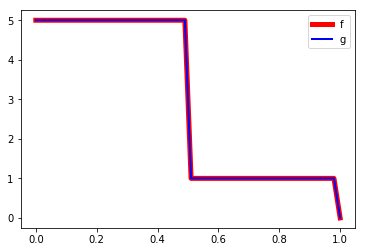

In [3]:
def f(x):
    '''
    Данная функция
    '''
    return 5 * Varphi(2 * x) + Varphi(2 * x - 1)

def g(x):
    '''
    Вейвлет-разложение
    '''
    return 3 * Varphi(x) - 2 * Psi(x)

# Строим графики
print('ПРОВЕРКА')
N = 50
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)
for i in range(N):
    X[i] = i / (N - 1)
    Y[i] = f(X[i])
    Z[i] = g(X[i])

plt.figure()
plt.plot(X, Y, '-r', LineWidth = 5, label = 'f')
plt.plot(X, Z, '-b', LineWidth = 2, label = 'g')
plt.legend()

**Пример 2.** Записать вейвлет-разложение

$$
f=a_{0,0} \varphi +\sum\limits_{j=0}^{n-1}\sum\limits_{k=0}^{2^{j} - 1}d_{j,k} \psi_{j,k},
$$

функции

$$
f(x)=y_{1} \varphi_{n,0} (x)+y_{2} \varphi_{n,1} (x)+\dots +y_{2^{n} } \varphi_{n, 2^{n} - 1} (x),
$$

где $y_{1},y_{2},\dots,y_{2^{n}}$ -- заданные числа. Дано

$$
\varphi (x)=\chi_{[0;1)} (x),~n=3,~y=\begin{pmatrix} 1 & 0 & -3 & 2 & 1 & 0 & 1 & 2 \end{pmatrix}.
$$

**Решение.** Результат работы алгоритма Малла представим в виде таблицы (нужные коэффициенты обведены)

![Image](ImageText/Table.JPG)

Следовательно, искомое разложение имеет вид
$$
f=\sqrt{2} \varphi +\sqrt{2} \psi -\psi _{1,0} +\psi _{1,1} -\frac{1}{\sqrt{2} } \psi _{2,0} +\frac{5}{\sqrt{2} } \psi _{2,1} -\frac{1}{\sqrt{2} } \psi _{2,2} +\frac{1}{\sqrt{2} } \psi _{2,3}.
$$ 

In [4]:
# Исходный вектор коэффициентов
Y = np.array([1,0,-3,2,1,0,1,2])
# Словарь вейвлет-коэффициентов: ключ (j,k) : значение коэф.
D = {0:math.sqrt(2), (0,0): math.sqrt(2), (1,0): -1, (1,1): 1, (2,0) : -1.0 / math.sqrt(2), (2,1) : 5.0 / math.sqrt(2), 
    (2,2) : -1.0 / math.sqrt(2), (2,3) : 1.0 / math.sqrt(2)} 

In [5]:
def fn(x, Y):
    '''
    Данная функция
    '''
    n = int(math.log(len(Y)) / math.log(2))
    z = 0
    for i in range(len(Y)):
        z += Y[i] * Varphi_jk(x, n, i)
    return z

def gn(x, D, Y):
    '''
    Разложение данной функции
    '''
    n = int(math.log(len(Y)) / math.log(2))
    z = D[(0)] * Varphi(x)
    for j in range(n):
        for k in range(pow(2, j)):
            if ((j, k) in D):
                z += D[(j, k)] * Psi_jk(x, j, k)
    return z

ПРОВЕРКА


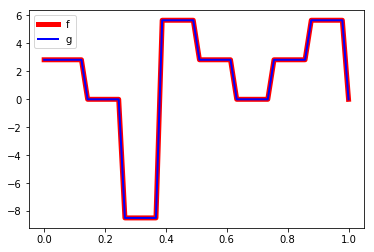

In [6]:
# Строим графики
print('ПРОВЕРКА')
N = 50
X = np.zeros(N)
F = np.zeros(N)
G = np.zeros(N)
for i in range(N):
    X[i] = i / (N - 1)
    F[i] = fn(X[i], Y)
    G[i] = gn(X[i], D, Y)
plt.figure()
plt.plot(X, F, '-r', LineWidth = 5, label = 'f')
plt.plot(X, G, '-b', LineWidth = 2, label = 'g')
plt.legend()

#### Литература

1. Столниц Э. Вейвлеты в компьютерной графике / Э. Столниц , Т. ДеРоуз, Д. Салезин.-- Ижевск: НИЦ "Регулярная и хаотическая динамика", 2002.
2. Новиков И.Я. Теория всплесков/ И.Я. Новиков, В.Ю. Протасов, М.А. Скопина.-- М.: ФИЗМАТЛИТ, 2005.
3. Фрейзер М. Введение в вэйвлеты в свете линейной алгебры / М. Фрейзер; пер. с англ. -- М. БИНОМ. Лаборатория знаний, 2008. -- 487 с.: ил.
4. Finkelstein A. Multiresolution Curves/ A. Finkelstein, David H. Salesin// Proceedings ACM SIGGRAPH.--1994.-- pp.261--268.
5. Смоленцев Н.К. Основы теории вейвлетов. Вейвлеты в MatLab/ Н.К Смоленцев.-- М.: ДМК Пресс, 2005
6. Люстерник Л.А., Соболев В.И. Краткий курс функционального анализа: Учебное пособие. 2-е изд., стер.--СПб.: Издательство "Лань", 2009.--272c.